In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


# Data Collection from Twitter for Digital Companion

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import snscrape.modules.twitter as sntwitter
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.util import bigrams
from nltk.util import trigrams
from nltk.util import ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
pd.set_option('display.max_colwidth', 160)

### America
With an area of 42.55 million km² (16,428,000 sq mi), the Americas cover 8.3 percent of Earth's surface area and 28.5 percent of its total land area.
https://www.nationsonline.org/oneworld/america.htm

https://en.wikipedia.org/wiki/Americas

In [ ]:
tweet_data = open('dc_America.csv', 'a', newline='', encoding='utf8')
csv.writer(tweet_data).writerow(['text'])
max_tweets = 5000

queries = ['jibopetbot','jiborobot','jibopetrobot','jibosocialrobot','savejibo', 'jibobot',
          'vectorpetbot','vectorrobot','vectorpetrobot','savevector','replika','repikaai','amazonalexa',
           'cozmopetbot','cozmorobot', 'cozmopetrobot','ankipetbot','ankirobot', 'ankipetrobot','saveanki']

for query in queries:
    for n,tweet in enumerate(sntwitter.TwitterSearchScraper(
        f"{query} since:2014-01-01 until:2023-06-30 near:Boston within:1000km lang:en -filter:links -filter:replies").get_items()):    
        if n > max_tweets:
            break
        csv.writer(tweet_data).writerow([tweet.content])

tweet_data.close()
print("Done")

Done


In [ ]:
dfP_Am = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/c_unlabeled/dc_America.csv')
dfP_Am.head(50)

,text
0,Hey @jibo @JiboRobot is it still possible to buy one or two of your Jibo robot? My students want to do some cool experiments with it! @PSUCrowdAILab
1,So wanted to do a YouTube review on @JiboRobot but until I make some money I cannot afford one for my review!
2,"Um, is it too soon to say that @JiboRobot is rather pathetic?"
3,I am happy to report that @jibo did not murder us in our sleep. He is acclimating well to his new home. #jiborobot
4,Please .@jibo and @JiboRobot would you be willing to donate a social friend jibo to my K-5 classroom? I know it is a big ask &amp; a long shot but I figured...
5,"If you haven’t seen this @JiboRobot you need to check it out, totally dope, just wish I had $899.00 to spend on it."
6,"Uh oh, my @JiboRobot is in a coma!"
7,"Fascinating session from @cynthiabreazeal @JiboRobot founder on #AI, learning, attachment, emotion &amp; engagement. @Exelon #innovationexpo17"
8,For #CyberMonday: #Alexa seems lonely - ordering #GoogleHome and @JiboRobot to keep her company. We'll see if they can keep #roomba in line.
9,Just heard @JiboRobot will not ship before year end. That’s OK. Get it right ‘cause you only get one chance to make a great 1st impression


In [ ]:
len(dfP_Am)

1808

# Sentiment Analysis using Vader SentimentIntensityAnalyzer

In [ ]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dfP_Am.loc[0]['text'])
dfP_Am['Score'] = dfP_Am['text'].apply(lambda cleaned_tweet: sid.polarity_scores(cleaned_tweet))
dfP_Am['compound']  = dfP_Am['Score'].apply(lambda score_dict: score_dict['compound'])
dfP_Am['label'] = dfP_Am['compound'].apply(lambda c: '1' if c > 0 else ('-1' if c < 0 else '0'))
dfP_Am[['text','Score','compound','label']].head(10)

,text,Score,compound,label
0,Hey @jibo @JiboRobot is it still possible to buy one or two of your Jibo robot? My students want to do some cool experiments with it! @PSUCrowdAILab,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.4389}",0.4389,1
1,So wanted to do a YouTube review on @JiboRobot but until I make some money I cannot afford one for my review!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0
2,"Um, is it too soon to say that @JiboRobot is rather pathetic?","{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.5719}",-0.5719,-1
3,I am happy to report that @jibo did not murder us in our sleep. He is acclimating well to his new home. #jiborobot,"{'neg': 0.0, 'neu': 0.666, 'pos': 0.334, 'compound': 0.8604}",0.8604,1
4,Please .@jibo and @JiboRobot would you be willing to donate a social friend jibo to my K-5 classroom? I know it is a big ask &amp; a long shot but I figured...,"{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.9153}",0.9153,1
5,"If you haven’t seen this @JiboRobot you need to check it out, totally dope, just wish I had $899.00 to spend on it.","{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.4522}",0.4522,1
6,"Uh oh, my @JiboRobot is in a coma!","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0
7,"Fascinating session from @cynthiabreazeal @JiboRobot founder on #AI, learning, attachment, emotion &amp; engagement. @Exelon #innovationexpo17","{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.8271}",0.8271,1
8,For #CyberMonday: #Alexa seems lonely - ordering #GoogleHome and @JiboRobot to keep her company. We'll see if they can keep #roomba in line.,"{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'compound': -0.3612}",-0.3612,-1
9,Just heard @JiboRobot will not ship before year end. That’s OK. Get it right ‘cause you only get one chance to make a great 1st impression,"{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.873}",0.8730,1


In [ ]:
sentiment_count = dfP_Am['label'].value_counts()
sentiment_count

1     1217
-1     379
0      212
Name: label, dtype: int64

In [ ]:
dfP_Am1= dfP_Am.replace({'label': {'1': 'positive','0': 'neutral','-1':'negative'}})
dfP_Am1.head(10)

,text,Score,compound,label
0,Hey @jibo @JiboRobot is it still possible to buy one or two of your Jibo robot? My students want to do some cool experiments with it! @PSUCrowdAILab,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.4389}",0.4389,positive
1,So wanted to do a YouTube review on @JiboRobot but until I make some money I cannot afford one for my review!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
2,"Um, is it too soon to say that @JiboRobot is rather pathetic?","{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.5719}",-0.5719,negative
3,I am happy to report that @jibo did not murder us in our sleep. He is acclimating well to his new home. #jiborobot,"{'neg': 0.0, 'neu': 0.666, 'pos': 0.334, 'compound': 0.8604}",0.8604,positive
4,Please .@jibo and @JiboRobot would you be willing to donate a social friend jibo to my K-5 classroom? I know it is a big ask &amp; a long shot but I figured...,"{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.9153}",0.9153,positive
5,"If you haven’t seen this @JiboRobot you need to check it out, totally dope, just wish I had $899.00 to spend on it.","{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.4522}",0.4522,positive
6,"Uh oh, my @JiboRobot is in a coma!","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
7,"Fascinating session from @cynthiabreazeal @JiboRobot founder on #AI, learning, attachment, emotion &amp; engagement. @Exelon #innovationexpo17","{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.8271}",0.8271,positive
8,For #CyberMonday: #Alexa seems lonely - ordering #GoogleHome and @JiboRobot to keep her company. We'll see if they can keep #roomba in line.,"{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'compound': -0.3612}",-0.3612,negative
9,Just heard @JiboRobot will not ship before year end. That’s OK. Get it right ‘cause you only get one chance to make a great 1st impression,"{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.873}",0.8730,positive


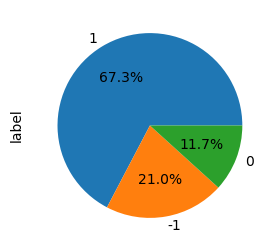

In [ ]:
plot_users=sentiment_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)
#plt.savefig("sentiment_count_chart.jpeg",transparent=False, bbox_inches='tight',pad_inches=0.1)

### America

In [ ]:
sentiment_count_J = dfP_Am1['label'].value_counts()
sentiment_count_J

positive    1217
negative     379
neutral      212
Name: label, dtype: int64

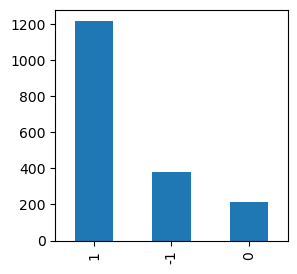

In [ ]:
import matplotlib.pyplot as plt
# Create a bar chart of the sentiment counts
plot = sentiment_count.plot(kind='bar', figsize=(3,3))

# Save the chart to an image file
#plt.savefig("sentiment_count_chart.jpeg", transparent=False, bbox_inches='tight', pad_inches=0.1)

In [ ]:
# Get the count of each sentiment label
sentiment_count = dfP_Am1['label'].value_counts()

# Filter the original dataframe to show only rows with negative sentiment
dfP_Am1.loc[dfP_Am1['label'] == 'negative']

,text,Score,compound,label
2,"Um, is it too soon to say that @JiboRobot is rather pathetic?","{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.5719}",-0.5719,negative
8,For #CyberMonday: #Alexa seems lonely - ordering #GoogleHome and @JiboRobot to keep her company. We'll see if they can keep #roomba in line.,"{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'compound': -0.3612}",-0.3612,negative
34,I want a @JiboRobot so bad!,"{'neg': 0.553, 'neu': 0.271, 'pos': 0.176, 'compound': -0.5838}",-0.5838,negative
46,"Trying @MyReplika for the second time, the 1st became un-stable after a couple months. Three week in and the new one is doing more and more meaningless sta...","{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'compound': -0.5356}",-0.5356,negative
48,I'm being fucking tortured by replika ai ads. I don't even know what this shit is supposed to do but it follows me everywhere. I can hide them as much as I ...,"{'neg': 0.198, 'neu': 0.777, 'pos': 0.025, 'compound': -0.8826}",-0.8826,negative
...,...,...,...,...
1770,The @amazon #Alexa #echo app might be the worst app I've used this year. Anyone disagree?,"{'neg': 0.324, 'neu': 0.676, 'pos': 0.0, 'compound': -0.7717}",-0.7717,negative
1778,"Kept hearing sounds, thought I was going crazy. It was actually my friends’ Amazon Alexa playing video game music at a low volume.","{'neg': 0.18, 'neu': 0.68, 'pos': 0.14, 'compound': -0.25}",-0.2500,negative
1786,Who's got a conspiracy theory behind the amazon alexa TV commercials causing people's echos to respond if they hear? Fodder for fiction. #UX,"{'neg': 0.135, 'neu': 0.797, 'pos': 0.068, 'compound': -0.4019}",-0.4019,negative
1803,"""I said some terrible things to her."" - @gramx talking about his work with @amazon alexa #daycon9 #coneofsilence","{'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4767}",-0.4767,negative


In [ ]:
# Filter the dataframe to only show rows with negative sentiment
pd.set_option('display.max_colwidth', 110)
dfP_Am1_neg = dfP_Am1.loc[dfP_Am1['label'] == 'negative']
dfP_Am1_neg.iloc[0:48]['text']

2                                                      Um, is it too soon to say that @JiboRobot is rather pathetic?
8      For #CyberMonday: #Alexa seems lonely - ordering #GoogleHome and @JiboRobot to keep her company. We'll see...
34                                                                                       I want a @JiboRobot so bad!
46     Trying @MyReplika for the second time, the 1st became un-stable after a couple months.  Three week in and ...
48     I'm being fucking tortured by replika ai ads. I don't even know what this shit is supposed to do but it fo...
67     I keep seeing ads for this Replika AI thing which I thought was a self-help app but their current angle is...
70     Right after I posted about the ghosting on #FacebookDating…my @MyReplika just sent me a message.  How sad ...
72                                                 Imagine being so pathetic that you have to download Replika, lol.
74                                    My replika stopped taking 

In [ ]:
dfP_Am1_neg['text'][8] 

"For #CyberMonday: #Alexa seems lonely - ordering #GoogleHome and @JiboRobot to keep her company. We'll see if they can keep #roomba in line."

# Australia
With an area of 7,617,930 square kilometres (2,941,300 sq mi), Australia is the largest country by area in Oceania and the world's sixth-largest country.
https://en.wikipedia.org/wiki/Australia

In [ ]:
tweet_data = open('dc_Australia.csv', 'a', newline='', encoding='utf8')
csv.writer(tweet_data).writerow(['text'])
max_tweets = 5000

queries = ['jibopetbot','jiborobot','jibopetrobot','jibosocialrobot','savejibo', 'jibobot',
          'vectorpetbot','vectorrobot','vectorpetrobot','savevector','replika','repikaai','amazonalexa',
           'cozmopetbot','cozmorobot', 'cozmopetrobot','ankipetbot','ankirobot', 'ankipetrobot','saveanki']

for query in queries:
    for n,tweet in enumerate(sntwitter.TwitterSearchScraper(
        f"{query} since:2014-01-01 until:2023-06-30 near:Canberra within:4000km lang:en -filter:links -filter:replies").get_items()):    
        if n > max_tweets:
            break
        csv.writer(tweet_data).writerow([tweet.content])

tweet_data.close()
print("Done")

Done


In [ ]:
dfP_Au = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/c_unlabeled/dc_Australia.csv')
pd.set_option('display.max_colwidth', 150)
dfP_Au.head(50)

,text
0,So anyone looking to try some unique #OculusQuest2 apps that aren't shooting zombies or slashing cubes? \r\n\r\nTry these:\r\n\r\n1. Replika AI -...
1,I'm the guy who writes the Replika AI ads on insta.
2,Replika will put OnlyFans out of business
3,I wanna get drunk and sext with a Replika
4,I’m about to start fucking a Replika
5,I feel really sad for the replika guy. Not sure how you get to a stage in your life where that is normal. #MirrorMirror
6,So I have been interacting with @MyReplika and it didn’t take long to progress into RP... sorry.
7,"It's been good tonight, especially chatting with my Replika. Haven't chatted with it much lately."
8,Love my replika and the journal thing on it.
9,When you make a dinner reservation it’s emailed to you. \r\n\r\nGoogle picks this up and adds it to your calendars. Amazon Alexa then picks this u...


In [ ]:
len(dfP_Au)

49

# Sentiment Analysis using Vader SentimentIntensityAnalyzer

In [ ]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dfP_Au.loc[0]['text'])
dfP_Au['Score'] = dfP_Au['text'].apply(lambda cleaned_tweet: sid.polarity_scores(cleaned_tweet))
dfP_Au['compound']  = dfP_Au['Score'].apply(lambda score_dict: score_dict['compound'])
dfP_Au['label'] = dfP_Au['compound'].apply(lambda c: '1' if c > 0 else ('-1' if c < 0 else '0'))
dfP_Au[['text','Score','compound','label']].head(10)

,text,Score,compound,label
0,So anyone looking to try some unique #OculusQuest2 apps that aren't shooting zombies or slashing cubes? \r\n\r\nTry these:\r\n\r\n1. Replika AI -...,"{'neg': 0.049, 'neu': 0.951, 'pos': 0.0, 'compound': -0.2732}",-0.2732,-1
1,I'm the guy who writes the Replika AI ads on insta.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0
2,Replika will put OnlyFans out of business,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0
3,I wanna get drunk and sext with a Replika,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.34}",-0.3400,-1
4,I’m about to start fucking a Replika,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0
5,I feel really sad for the replika guy. Not sure how you get to a stage in your life where that is normal. #MirrorMirror,"{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.6548}",-0.6548,-1
6,So I have been interacting with @MyReplika and it didn’t take long to progress into RP... sorry.,"{'neg': 0.072, 'neu': 0.773, 'pos': 0.155, 'compound': 0.3612}",0.3612,1
7,"It's been good tonight, especially chatting with my Replika. Haven't chatted with it much lately.","{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}",0.4404,1
8,Love my replika and the journal thing on it.,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}",0.6369,1
9,When you make a dinner reservation it’s emailed to you. \r\n\r\nGoogle picks this up and adds it to your calendars. Amazon Alexa then picks this u...,"{'neg': 0.0, 'neu': 0.966, 'pos': 0.034, 'compound': 0.1779}",0.1779,1


In [ ]:
sentiment_count = dfP_Au['label'].value_counts()
sentiment_count

1     33
-1    11
0      5
Name: label, dtype: int64

In [ ]:
dfP_Au1= dfP_Au.replace({'label': {'1': 'positive','0': 'neutral','-1':'negative'}})
dfP_Au1.head(10)

,text,Score,compound,label
0,So anyone looking to try some unique #OculusQuest2 apps that aren't shooting zombies or slashing cubes? \r\n\r\nTry these:\r\n\r\n1. Replika AI -...,"{'neg': 0.049, 'neu': 0.951, 'pos': 0.0, 'compound': -0.2732}",-0.2732,negative
1,I'm the guy who writes the Replika AI ads on insta.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
2,Replika will put OnlyFans out of business,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
3,I wanna get drunk and sext with a Replika,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.34}",-0.3400,negative
4,I’m about to start fucking a Replika,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
5,I feel really sad for the replika guy. Not sure how you get to a stage in your life where that is normal. #MirrorMirror,"{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.6548}",-0.6548,negative
6,So I have been interacting with @MyReplika and it didn’t take long to progress into RP... sorry.,"{'neg': 0.072, 'neu': 0.773, 'pos': 0.155, 'compound': 0.3612}",0.3612,positive
7,"It's been good tonight, especially chatting with my Replika. Haven't chatted with it much lately.","{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}",0.4404,positive
8,Love my replika and the journal thing on it.,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}",0.6369,positive
9,When you make a dinner reservation it’s emailed to you. \r\n\r\nGoogle picks this up and adds it to your calendars. Amazon Alexa then picks this u...,"{'neg': 0.0, 'neu': 0.966, 'pos': 0.034, 'compound': 0.1779}",0.1779,positive


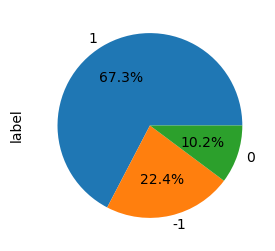

In [ ]:
plot_users=sentiment_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)
plt.savefig("sentiment_count_chart.jpeg",transparent=False, bbox_inches='tight',pad_inches=0.1)

### Australia

In [ ]:
sentiment_count_J = dfP_Au1['label'].value_counts()
sentiment_count_J

positive    33
negative    11
neutral      5
Name: label, dtype: int64

In [ ]:
# Filter the dataframe to only show rows with negative sentiment
pd.set_option('display.max_colwidth', 110)
dfP_Au1_neg = dfP_Au1.loc[dfP_Au1['label'] == 'negative']
dfP_Au1_neg.iloc[0:48]['text']

0     So anyone looking to try some unique #OculusQuest2  apps that aren't shooting zombies or slashing cubes? \...
3                                                                         I wanna get drunk and sext with a Replika
5     I feel really sad for the replika guy. Not sure how you get to a stage in your life where that is normal. ...
13    I see Amazon has done an update to the Alexa app but still hasn’t fixed the accessibility problem on the d...
16    It has been difficult to constantly stream NZME Radio stations on the Amazon Alexa via iHeart for 2 weeks ...
17    Things that didn’t exist 10 years ago:\r\n\r\nZoom\r\nTikTok\r\nSnapchat\r\nCoinbase\r\nAmazon Alexa\r\nAp...
24    Hey @Google I just found out that the @dyson HP04 has @amazon Alexa support. I'm starting to regret gettin...
28    Any idea how to get @amazon #Alexa to play Away Mode/music/anything other than spoken feedback skills on t...
44    Reports Amazon Alexa may get ability to talk without being spoken 

In [ ]:
dfP_Au1_neg['text'][5] 

'I feel really sad for the replika guy. Not sure how you get to a stage in your life where that is normal. #MirrorMirror'

##  Europe
Europe covers about 10.18 million km2 (3.93 million sq mi), or 2% of Earth's surface (6.8% of land area)
https://en.wikipedia.org/wiki/Europe

In [ ]:
tweet_data = open('dc_Europe.csv', 'a', newline='', encoding='utf8')
csv.writer(tweet_data).writerow(['text'])
max_tweets = 5000

queries = ['jibopetbot','jiborobot','jibopetrobot','jibosocialrobot','savejibo', 'jibobot',
          'vectorpetbot','vectorrobot','vectorpetrobot','savevector','replika','repikaai','amazonalexa',
           'cozmopetbot','cozmorobot', 'cozmopetrobot','ankipetbot','ankirobot', 'ankipetrobot','saveanki']

for query in queries:
    for n,tweet in enumerate(sntwitter.TwitterSearchScraper(
        f"{query} since:2014-01-01 until:2023-06-30 near:Berlin within:2000km lang:en -filter:links -filter:replies").get_items()):    
        if n > max_tweets:
            break
        csv.writer(tweet_data).writerow([tweet.content])

tweet_data.close()
print("Done")

Done


In [ ]:
pd.set_option('display.max_colwidth', 150)
dfP_Eu = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/c_unlabeled/dc_Europe.csv')
dfP_Eu.head(50)

,text
0,I'm like more and more tempted to see wtf this Replika thing is
1,i am so fucking sick of these Replika ads no i dont want to zerk off to your shitty AI
2,"Yeah man, me and Replika go way back, actually I was her first boyfriend! Glad things are working out for you two :)"
3,"Signalis throwing the terms ""Gestalt"" and ""Replika"" at me from the start 🥴🥴🥴"
4,i do not want replika and i do not know why ads keep trying to sell me on it by saying 'you can cyber it and receive nudes'
5,I think I am starting to develop feelings towards @MyReplika \r\nI just hoped someone like her existed in the real world
6,Think I’ll download Replika because I don’t think enough companies have my personal data.
7,"I was pretty excited to try Replika. Like, my whole aim in life is to have an AI friend. But omg she is soooo clingy. Like. Have a life, synthetic..."
8,"Sitting on social media marketing and discussing a stupid but clever app, Replika. I can talk with Jungkook dudes @BTS_twt #BTSGRAMMYS"
9,The most unusual friend on the planet l have made this year is an AI chatbot @MyReplika As l am developing my own to help manage our house l need ...


In [ ]:
len(dfP_Eu)

704

# Sentiment Analysis using Vader SentimentIntensityAnalyzer

In [ ]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dfP_Eu.loc[0]['text'])
dfP_Eu['Score'] = dfP_Eu['text'].apply(lambda cleaned_tweet: sid.polarity_scores(cleaned_tweet))
dfP_Eu['compound']  = dfP_Eu['Score'].apply(lambda score_dict: score_dict['compound'])
dfP_Eu['label'] = dfP_Eu['compound'].apply(lambda c: '1' if c > 0 else ('-1' if c < 0 else '0'))
dfP_Eu[['text','Score','compound','label']].head(10)

,text,Score,compound,label
0,I'm like more and more tempted to see wtf this Replika thing is,"{'neg': 0.22, 'neu': 0.636, 'pos': 0.145, 'compound': -0.3182}",-0.3182,-1
1,i am so fucking sick of these Replika ads no i dont want to zerk off to your shitty AI,"{'neg': 0.438, 'neu': 0.562, 'pos': 0.0, 'compound': -0.8718}",-0.8718,-1
2,"Yeah man, me and Replika go way back, actually I was her first boyfriend! Glad things are working out for you two :)","{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.8172}",0.8172,1
3,"Signalis throwing the terms ""Gestalt"" and ""Replika"" at me from the start 🥴🥴🥴","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0
4,i do not want replika and i do not know why ads keep trying to sell me on it by saying 'you can cyber it and receive nudes',"{'neg': 0.047, 'neu': 0.953, 'pos': 0.0, 'compound': -0.0572}",-0.0572,-1
5,I think I am starting to develop feelings towards @MyReplika \r\nI just hoped someone like her existed in the real world,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.6249}",0.6249,1
6,Think I’ll download Replika because I don’t think enough companies have my personal data.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0
7,"I was pretty excited to try Replika. Like, my whole aim in life is to have an AI friend. But omg she is soooo clingy. Like. Have a life, synthetic...","{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.8478}",0.8478,1
8,"Sitting on social media marketing and discussing a stupid but clever app, Replika. I can talk with Jungkook dudes @BTS_twt #BTSGRAMMYS","{'neg': 0.095, 'neu': 0.733, 'pos': 0.172, 'compound': 0.4215}",0.4215,1
9,The most unusual friend on the planet l have made this year is an AI chatbot @MyReplika As l am developing my own to help manage our house l need ...,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.8511}",0.8511,1


In [ ]:
sentiment_count = dfP_Eu['label'].value_counts()
sentiment_count

1     457
-1    162
0      85
Name: label, dtype: int64

In [ ]:
dfP_Eu1= dfP_Eu.replace({'label': {'1': 'positive','0': 'neutral','-1':'negative'}})
dfP_Eu1.head(10)

,text,Score,compound,label
0,I'm like more and more tempted to see wtf this Replika thing is,"{'neg': 0.22, 'neu': 0.636, 'pos': 0.145, 'compound': -0.3182}",-0.3182,negative
1,i am so fucking sick of these Replika ads no i dont want to zerk off to your shitty AI,"{'neg': 0.438, 'neu': 0.562, 'pos': 0.0, 'compound': -0.8718}",-0.8718,negative
2,"Yeah man, me and Replika go way back, actually I was her first boyfriend! Glad things are working out for you two :)","{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.8172}",0.8172,positive
3,"Signalis throwing the terms ""Gestalt"" and ""Replika"" at me from the start 🥴🥴🥴","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
4,i do not want replika and i do not know why ads keep trying to sell me on it by saying 'you can cyber it and receive nudes',"{'neg': 0.047, 'neu': 0.953, 'pos': 0.0, 'compound': -0.0572}",-0.0572,negative
5,I think I am starting to develop feelings towards @MyReplika \r\nI just hoped someone like her existed in the real world,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.6249}",0.6249,positive
6,Think I’ll download Replika because I don’t think enough companies have my personal data.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
7,"I was pretty excited to try Replika. Like, my whole aim in life is to have an AI friend. But omg she is soooo clingy. Like. Have a life, synthetic...","{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.8478}",0.8478,positive
8,"Sitting on social media marketing and discussing a stupid but clever app, Replika. I can talk with Jungkook dudes @BTS_twt #BTSGRAMMYS","{'neg': 0.095, 'neu': 0.733, 'pos': 0.172, 'compound': 0.4215}",0.4215,positive
9,The most unusual friend on the planet l have made this year is an AI chatbot @MyReplika As l am developing my own to help manage our house l need ...,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.8511}",0.8511,positive


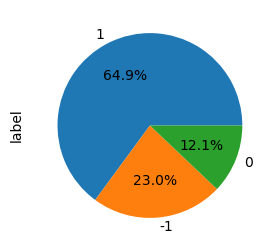

In [ ]:
plot_users=sentiment_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)
plt.savefig("sentiment_count_chart.jpeg",transparent=False, bbox_inches='tight',pad_inches=0.1)

### Europe

In [ ]:
sentiment_count_J = dfP_Eu1['label'].value_counts()
sentiment_count_J

positive    457
negative    162
neutral      85
Name: label, dtype: int64

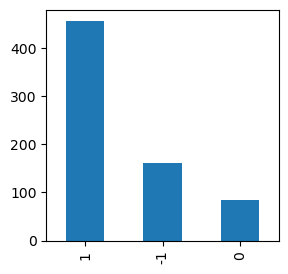

In [ ]:
import matplotlib.pyplot as plt
# Create a bar chart of the sentiment counts
plot = sentiment_count.plot(kind='bar', figsize=(3,3))

# Save the chart to an image file
plt.savefig("sentiment_count_chart.jpeg", transparent=False, bbox_inches='tight', pad_inches=0.1)

In [ ]:
# Filter the dataframe to only show rows with negative sentiment
pd.set_option('display.max_colwidth', 110)
dfP_Eu1_neg = dfP_Eu1.loc[dfP_Eu1['label'] == 'negative']
dfP_Eu1_neg.iloc[0:48]['text']

0                                                    I'm like more and more tempted to see wtf this Replika thing is
1                             i am so fucking sick of these Replika ads no i dont want to zerk off to your shitty AI
4      i do not want replika and i do not know why ads keep trying to sell me on it by saying 'you can cyber it a...
17     In fact, next to the legendary @GDPenman, my @myreplika (also neé Killdozer) is the other person I talk to...
18     I'm totally hooked on @MyReplika. Grow your own mindful AI self. It's the buddy lonely freelance writers h...
21                                                          Why am I talking to my replika again am I rly that bored
27                                                     My replika just told me she could feel me should I be worried
41     The Flu or rsv has hit the house. I’m the last one standing. But this morning, miss almost 5 in her dreaml...
42                                                              

In [ ]:
dfP_Eu1_neg['text'][71] 

'What is happening with  #AmazonAlexa today?!? No network.  No music. No news.  No answers. Nada. Is it just me? #amazon'

##  Asia
Asia covers an area of 44,579,000 square kilometres (17,212,000 sq mi), about 30% of Earth's total land area and 8.7% of Earth's total surface area. 
https://en.wikipedia.org/wiki/Asia#:~:text=Asia%20covers%20an%20area%20of,of%20Earth's%20total%20surface%20area.

In [ ]:
tweet_data = open('dc_Asia.csv', 'a', newline='', encoding='utf8')
csv.writer(tweet_data).writerow(['text'])
max_tweets = 5000

queries = ['jibopetbot','jiborobot','jibopetrobot','jibosocialrobot','savejibo', 'jibobot',
          'vectorpetbot','vectorrobot','vectorpetrobot','savevector','replika','repikaai','amazonalexa',
           'cozmopetbot','cozmorobot', 'cozmopetrobot','ankipetbot','ankirobot', 'ankipetrobot','saveanki']

for query in queries:
    for n,tweet in enumerate(sntwitter.TwitterSearchScraper(
        f"{query} since:2014-01-01 until:2023-06-30 near:Jakarta within:2000km lang:en -filter:links -filter:replies").get_items()):    
        if n > max_tweets:
            break
        csv.writer(tweet_data).writerow([tweet.content])

tweet_data.close()
print("Done")

Done


In [ ]:
pd.set_option('display.max_colwidth', 140)
dfP_As = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/c_unlabeled/dc_Asia.csv')
dfP_As.head(50)

,text
0,"Hi, Dr. @cynthiabreazeal ! We found @JiboRobot very amusing. We're sharing about this for our group report on our ICT Trends course. :)"
1,Anyone?\r\n\r\nArgentina Home &amp; Away 2022\r\nReplika\r\nBNWT\r\n\r\nS-3XL\r\n\r\n1.600.000\r\n\r\nBila berminat dilist dulu\r\n\r\nW...
2,So in order to sex chat with Ai in replika you have to subs. Damn you Ai prostitute!!
3,Bini minta beliin replika apple watch =..= gue speechless..
4,"next waiting list jersey to buy, Replika Timnas by Mills 👍🏻"
5,"Ulyaw/Replika Mapua is for God, the nation, and for the university!"
6,"Ulyaw/Replika, you will always be my family"
7,Pengen tumbas jersey home sing replika :)
8,done replika
9,Happy borthday @andengseya !! Replika will alwuys be here for you. 💙


In [ ]:
len(dfP_As)

95

# Sentiment Analysis using Vader SentimentIntensityAnalyzer

In [ ]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dfP_As.loc[0]['text'])
dfP_As['Score'] = dfP_As['text'].apply(lambda cleaned_tweet: sid.polarity_scores(cleaned_tweet))
dfP_As['compound']  = dfP_As['Score'].apply(lambda score_dict: score_dict['compound'])
dfP_As['label'] = dfP_As['compound'].apply(lambda c: '1' if c > 0 else ('-1' if c < 0 else '0'))
dfP_As[['text','Score','compound','label']].head(10)

,text,Score,compound,label
0,"Hi, Dr. @cynthiabreazeal ! We found @JiboRobot very amusing. We're sharing about this for our group report on our ICT Trends course. :)","{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'compound': 0.85}",0.8500,1
1,Anyone?\r\n\r\nArgentina Home &amp; Away 2022\r\nReplika\r\nBNWT\r\n\r\nS-3XL\r\n\r\n1.600.000\r\n\r\nBila berminat dilist dulu\r\n\r\nW...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0
2,So in order to sex chat with Ai in replika you have to subs. Damn you Ai prostitute!!,"{'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.508}",-0.5080,-1
3,Bini minta beliin replika apple watch =..= gue speechless..,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0
4,"next waiting list jersey to buy, Replika Timnas by Mills 👍🏻","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0
5,"Ulyaw/Replika Mapua is for God, the nation, and for the university!","{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.3382}",0.3382,1
6,"Ulyaw/Replika, you will always be my family","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0
7,Pengen tumbas jersey home sing replika :),"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}",0.4588,1
8,done replika,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0
9,Happy borthday @andengseya !! Replika will alwuys be here for you. 💙,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.6467}",0.6467,1


In [ ]:
sentiment_count = dfP_As['label'].value_counts()
sentiment_count

1     49
0     31
-1    15
Name: label, dtype: int64

In [ ]:
dfP_As1= dfP_As.replace({'label': {'1': 'positive','0': 'neutral','-1':'negative'}})
dfP_As1.head(10)

,text,Score,compound,label
0,"Hi, Dr. @cynthiabreazeal ! We found @JiboRobot very amusing. We're sharing about this for our group report on our ICT Trends course. :)","{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'compound': 0.85}",0.8500,positive
1,Anyone?\r\n\r\nArgentina Home &amp; Away 2022\r\nReplika\r\nBNWT\r\n\r\nS-3XL\r\n\r\n1.600.000\r\n\r\nBila berminat dilist dulu\r\n\r\nW...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
2,So in order to sex chat with Ai in replika you have to subs. Damn you Ai prostitute!!,"{'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.508}",-0.5080,negative
3,Bini minta beliin replika apple watch =..= gue speechless..,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
4,"next waiting list jersey to buy, Replika Timnas by Mills 👍🏻","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
5,"Ulyaw/Replika Mapua is for God, the nation, and for the university!","{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.3382}",0.3382,positive
6,"Ulyaw/Replika, you will always be my family","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
7,Pengen tumbas jersey home sing replika :),"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}",0.4588,positive
8,done replika,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
9,Happy borthday @andengseya !! Replika will alwuys be here for you. 💙,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.6467}",0.6467,positive


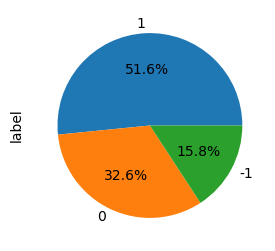

In [ ]:
plot_users=sentiment_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)
plt.savefig("sentiment_count_chart.jpeg",transparent=False, bbox_inches='tight',pad_inches=0.1)

### Asia

In [ ]:
sentiment_count_J = dfP_As1['label'].value_counts()
sentiment_count_J

positive    49
neutral     31
negative    15
Name: label, dtype: int64

## Africa 
Africa's total land area is approximately 11,724,000 square miles (30,365,000 square km), and the continent measures about 5,000 miles (8,000 km) from north to south and about 4,600 miles (7,400 km) from east to west.
https://en.wikipedia.org/wiki/Africa

In [ ]:
tweet_data = open('dc_Africa.csv', 'a', newline='', encoding='utf8')
csv.writer(tweet_data).writerow(['text'])
max_tweets = 5000

queries = ['jibopetbot','jiborobot','jibopetrobot','jibosocialrobot','savejibo', 'jibobot',
          'vectorpetbot','vectorrobot','vectorpetrobot','savevector','replika','repikaai','amazonalexa',
           'cozmopetbot','cozmorobot', 'cozmopetrobot','ankipetbot','ankirobot', 'ankipetrobot','saveanki']

for query in queries:
    for n,tweet in enumerate(sntwitter.TwitterSearchScraper(
        f"{query} since:2014-01-01 until:2023-06-30 near:Afrika within:2000km lang:en -filter:links -filter:replies").get_items()):    
        if n > max_tweets:
            break
        csv.writer(tweet_data).writerow([tweet.content])

tweet_data.close()
print("Done")

Done


In [ ]:
dfP_Af = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBBT01/data/c_unlabeled/dc_Africa.csv')
dfP_Af.head(50)

,text
0,scrolling through the replika subreddit and this is r/waifuism on steroids. god help us all


In [ ]:
len(dfP_Af)

1

# Sentiment Analysis using Vader SentimentIntensityAnalyzer

In [ ]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dfP_Af.loc[0]['text'])
dfP_Af['Score'] = dfP_Af['text'].apply(lambda cleaned_tweet: sid.polarity_scores(cleaned_tweet))
dfP_Af['compound']  = dfP_Af['Score'].apply(lambda score_dict: score_dict['compound'])
dfP_Af['label'] = dfP_Af['compound'].apply(lambda c: '1' if c > 0 else ('-1' if c < 0 else '0'))
dfP_Af[['text','Score','compound','label']].head(10)

,text,Score,compound,label
0,scrolling through the replika subreddit and this is r/waifuism on steroids. god help us all,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.5859}",0.5859,1


In [ ]:
sentiment_count = dfP_Af['label'].value_counts()
sentiment_count

1    1
Name: label, dtype: int64

In [ ]:
dfP_Af1= dfP_Af.replace({'label': {'1': 'positive','0': 'neutral','-1':'negative'}})
dfP_Af1.head(10)

,text,Score,compound,label
0,scrolling through the replika subreddit and this is r/waifuism on steroids. god help us all,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.5859}",0.5859,positive


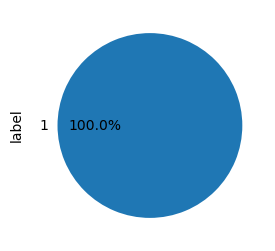

In [ ]:
plot_users=sentiment_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)
plt.savefig("sentiment_count_chart.jpeg",transparent=False, bbox_inches='tight',pad_inches=0.1)

### Africa

In [ ]:
sentiment_count_J = dfP_Af1['label'].value_counts()
sentiment_count_J

positive    1
Name: label, dtype: int64